In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from torchvision.utils import make_grid
import torchvision.transforms as T
import sys
from pathlib import Path

module_path = str(Path.cwd().parent)
if module_path not in sys.path:
    sys.path.append(module_path)

from models._styleextraction import StyleExtractorManager

In [3]:
def plot_style_embedding(style_stats, use_tsne=True):
    mu = style_stats.mu.squeeze(-1).squeeze(-1).squeeze(-1)  # [L, D, C]
    sig = style_stats.sig.squeeze(-1).squeeze(-1).squeeze(-1)

    L, D, C = mu.shape
    embeddings, labels = [], []

    for layer in range(L):
        for domain in range(D):
            style_vec = torch.cat([mu[layer, domain], sig[layer, domain]], dim=0)
            embeddings.append(style_vec.numpy())
            labels.append(f"L{layer}-D{domain}")

    X = np.stack(embeddings)
    reducer = TSNE(n_components=2, perplexity=5) if use_tsne else PCA(n_components=2)
    X_embedded = reducer.fit_transform(X)

    plt.figure(figsize=(8, 6))
    for i, label in enumerate(labels):
        plt.scatter(X_embedded[i, 0], X_embedded[i, 1], label=label)
    plt.title("t-SNE Embedding: mu + sig")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [4]:
def visualize_feature_maps(before, after, num_channels=4):
    """
    Visualises feature maps before and after MixStyle
    before/after: Tensor [B, C, H, W]
    """
    before = before[0, :num_channels]  # first sample
    after = after[0, :num_channels]

    before_grid = make_grid(before.unsqueeze(1), normalize=True, nrow=num_channels).squeeze(0)
    after_grid = make_grid(after.unsqueeze(1), normalize=True, nrow=num_channels).squeeze(0)

    fig, axs = plt.subplots(2, 1, figsize=(12, 5))
    axs[0].imshow(before_grid.cpu(), cmap='viridis')
    axs[0].set_title("Before MixStyle")
    axs[0].axis('off')

    axs[1].imshow(after_grid.cpu(), cmap='viridis')
    axs[1].set_title("After MixStyle")
    axs[1].axis('off')

    plt.tight_layout()
    plt.show()

In [5]:
def plot_mu_heatmap(style_stats, channel=0):
    mu = style_stats.mu.squeeze(-1).squeeze(-1).squeeze(-1)  # [L, D, C]
    heatmap_data = mu[:, :, channel].T.numpy()  # [Domain, Layer]
    sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="magma")
    plt.xlabel("Layer")
    plt.ylabel("Domain")
    plt.title(f"mu Heatmap (Channel {channel})")
    plt.show()

In [6]:
def plot_std_heatmap(style_stats, channel=0):
    sig = style_stats.sig.squeeze(-1).squeeze(-1).squeeze(-1)  # [L, D, C]
    heatmap_data = sig[:, :, channel].T.numpy()  # [Domain, Layer]
    sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="magma")
    plt.xlabel("Layer")
    plt.ylabel("Domain")
    plt.title(f"std Heatmap (Channel {channel})")
    plt.show()

In [7]:
style = StyleExtractorManager
style_stats = style.load("style_stats.json")

# t-SNE Embedding
plot_style_embedding(style_stats)

# feature map comparison (f.e. from one training run)
# before = some_feature_map.clone()
# after = mixstyle_layer(some_feature_map)
# visualize_feature_maps(before, after)

# heatmap
plot_mu_heatmap(style_stats, channel=0)
plot_std_heatmap(style_stats, channel=0)


AttributeError: type object 'StyleExtractorManager' has no attribute 'load'

In [ ]:
import sys
from pathlib import Path

# 1. Korrekten Projektroot setzen
project_root = Path("/home/hahlers/mixStyle-TTA")  # ODER: Path.cwd().parent
print(f"Projektroot: {project_root}")

# 2. Pfadüberprüfung
tuning_path = project_root / "models" / "tuning"
hptuning_file = tuning_path / "_hyperparameter_tuning.py"
print(f"Existiert tuning Modul?: {hptuning_file.exists()}")

# 3. Pfad zum Systempfad hinzufügen
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

# 4. Import mit Debugging
try:
    from models.tuning._hyperparameter_tuning import HP_Tuner
    print("Import erfolgreich!")
    
    # Testausführung
    test_path = project_root / "experiments" / "hp_results"
    if test_path.exists():
        result = HP_Tuner.compute_global_best_params(str(test_path))
        print(f"Beste Genauigkeit: {result['mean_val_acc']:.2%}")
    else:
        print(f"Testpfad {test_path} existiert nicht!")
except ImportError as e:
    print(f"Import fehlgeschlagen: {e}")
    print("Mögliche Lösungen:")
    print("1. Sicherstellen, dass '_hyperparameter_tuning.py' existiert")
    print("2. __init__.py Dateien in models/ und models/tuning/ erstellen")
    print("3. Absoluten Pfad verwenden:")
    print(f"   from {tuning_path}._hyperparameter_tuning import HP_Tuner")

Projektroot: /home/hahlers/mixStyle-TTA
Existiert tuning Modul?: True
Import erfolgreich!


IndexError: single positional indexer is out-of-bounds

In [ ]:
import torch
import torchvision.models as models

# Load a pre-trained ResNet model
model = models.resnet50(pretrained=True)

# Print the model's architecture
print(model)

/home/hahlers/miniconda3/envs/server_env/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/hahlers/miniconda3/envs/server_env/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /home/hahlers/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 105MB/s] 


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

from models._resnet import resnet50

model = resnet50(pretrained=True, num_classes=7, num_domains=4)
print(model)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): BatchN

In [ ]:
import torch

def unnormalize(img_tensor, mean, std):
    mean = torch.tensor(mean).view(-1, 1, 1)
    std = torch.tensor(std).view(-1, 1, 1)
    return img_tensor * std + mean

In [ ]:
import matplotlib.pyplot as plt
import torchvision.transforms.functional as TF

import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

from data._datasets import DomainDataset, PACS, VLCS, get_dataset

def show_one_image_per_class_per_domain(dataset: DomainDataset, name: str):
    """
    Visualizes one image per class from each domain in the dataset.
    """
    num_domains = len(dataset.data)
    num_classes = dataset.num_classes
    fig, axes = plt.subplots(num_domains, num_classes, figsize=(3 * num_classes, 3 * num_domains))

    if num_domains == 1:
        axes = [axes]  # Ensure it's iterable if only one domain

    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]

    for domain_idx, domain_data in enumerate(dataset.data):
        found_classes = set()
        for img, label in domain_data:
            if label not in found_classes:
                ax = axes[domain_idx][label] if num_classes > 1 else axes[domain_idx]

                img = unnormalize(img, mean, std)
                img = torch.clamp(img, 0, 1)

                img = TF.to_pil_image(img)
                ax.imshow(img)
                ax.set_title(f"{dataset.domains[domain_idx]} - {dataset.classes[label]}")
                ax.axis('off')
                found_classes.add(label)
            if len(found_classes) == num_classes:
                break

    plt.tight_layout()
    plt.savefig(name)
    plt.show()

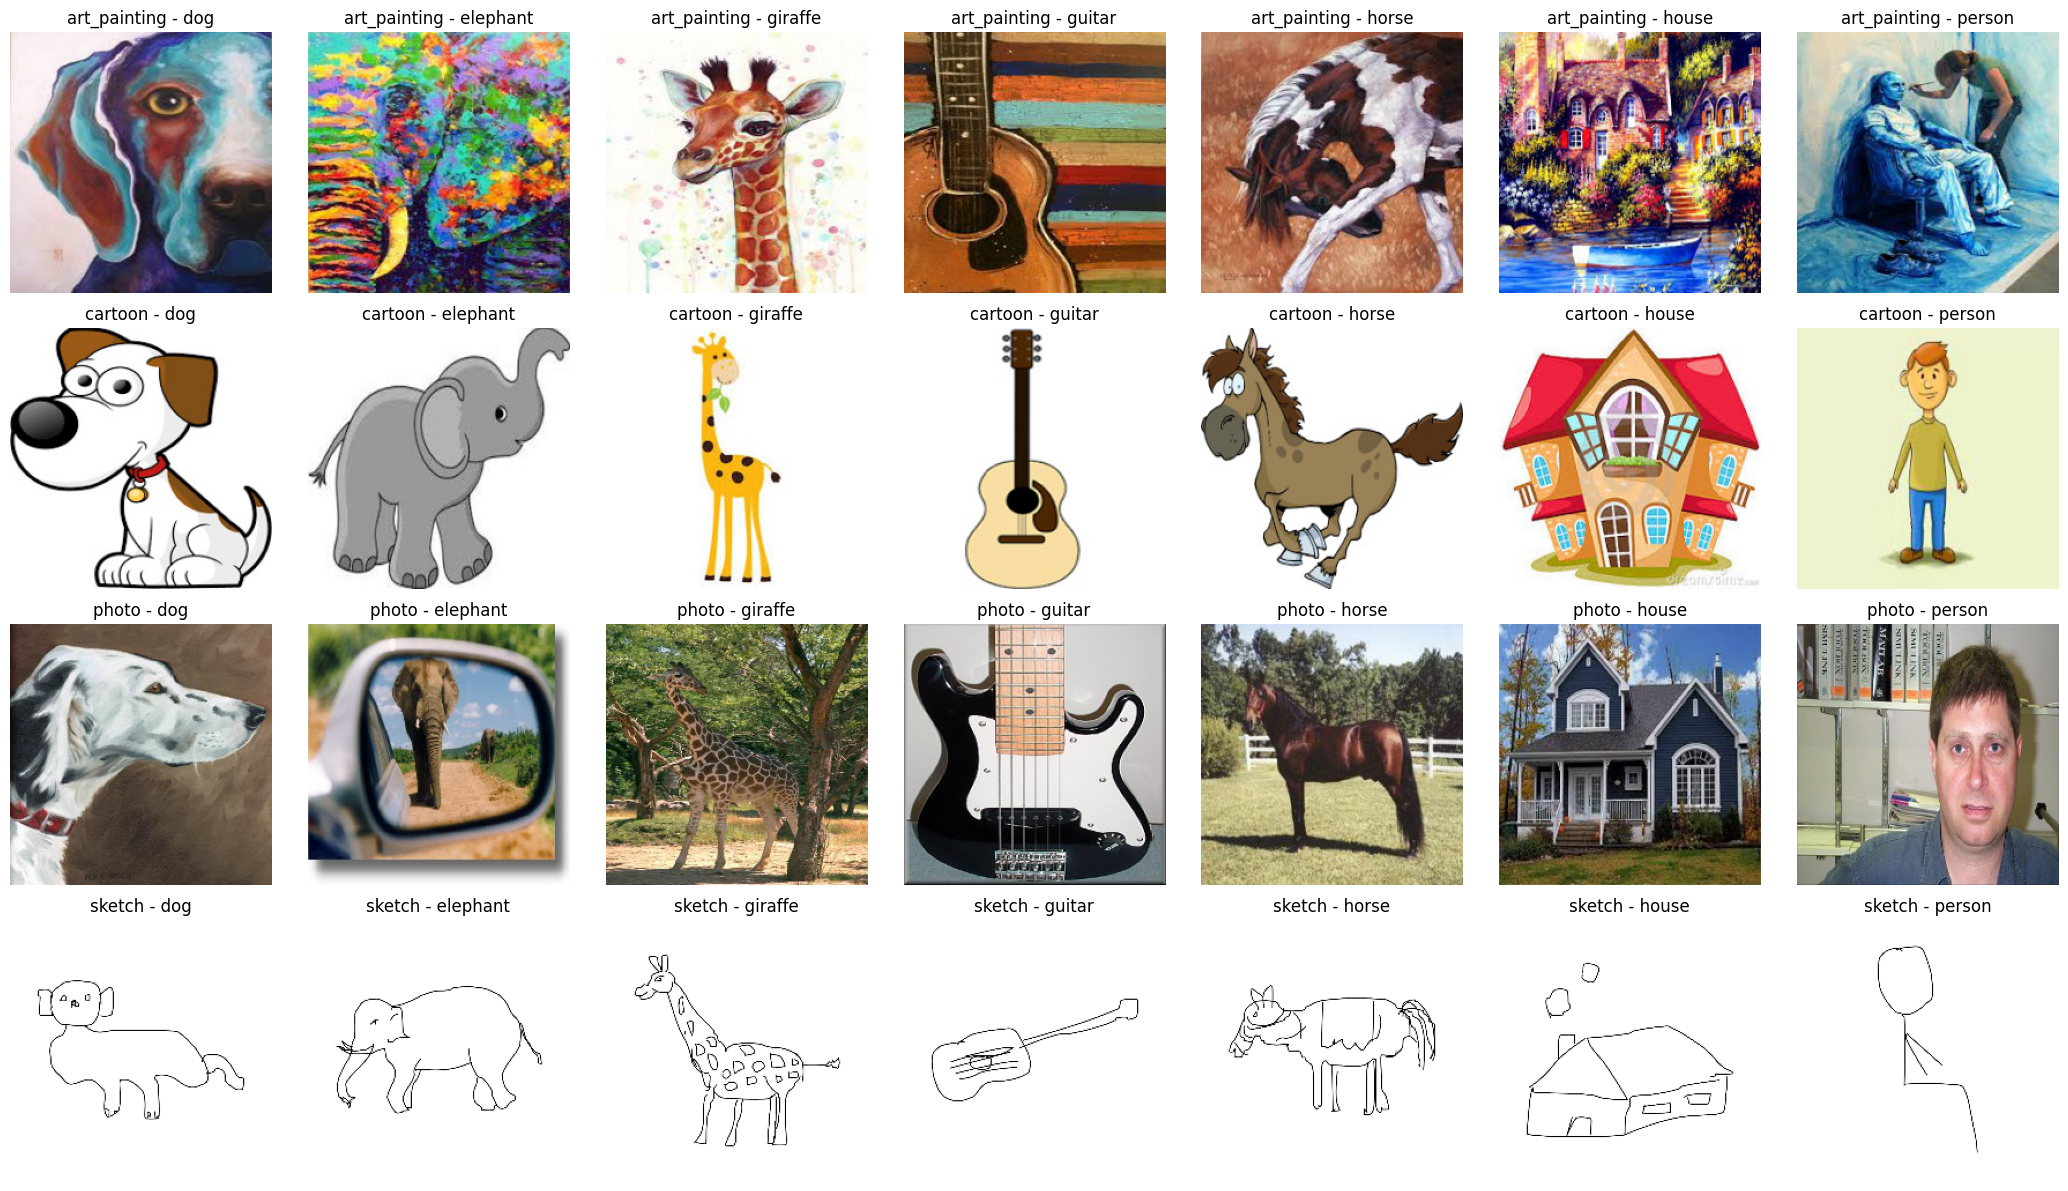

In [ ]:
dataset = PACS(root='/mnt/data/hahlers/datasets', test_domain=None)
show_one_image_per_class_per_domain(dataset, name="pacs.jpg")

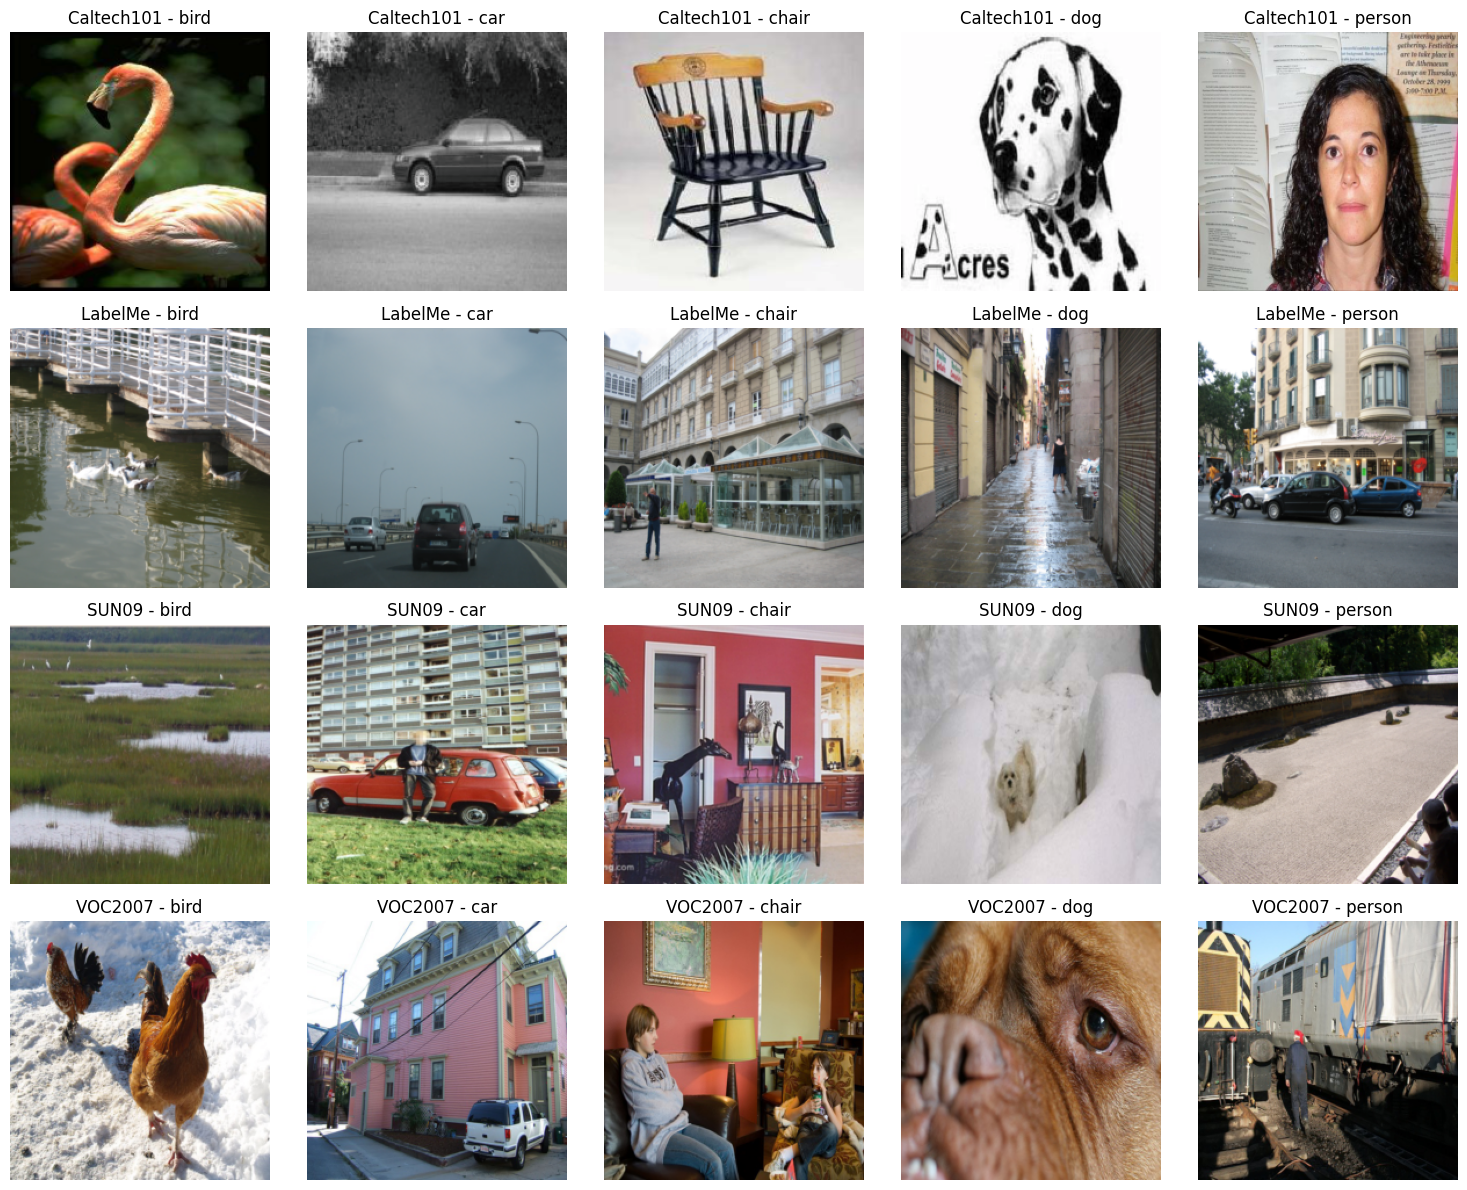

In [ ]:
dataset = VLCS(root='/mnt/data/hahlers/datasets', test_domain=None)
show_one_image_per_class_per_domain(dataset, name="vlcs.jpg")

In [ ]:
#version bevor ich in _resnet.py/__init__/self.style_stats_config = style_stats_config or 
# {'mode': 'selective', den mode auf selective gesetzt habe
import torch
state = torch.load("/home/hahlers/mixStyle-TTA/experiments/train_results/saved_models/seed_42/best_fold_art_painting.pt")
print(state.keys())
style_stats = state["style_stats"]
print(style_stats)

/tmp/ipykernel_4151833/264347683.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load("/home/hahlers/mixStyle-TTA/experiments/train_results/saved_models/se

dict_keys(['model_state_dict', 'style_stats', 'style_stats_config', 'fold', 'config', 'git_hash', 'timestamp'])
OrderedDict([('layer_counts', tensor([[11952,     0,     0,     0],
        [10896,     0,     0,     0],
        [12656,     0,     0,     0],
        [    0,     0,     0,     0]], device='cuda:0')), ('count', tensor([11952, 10896, 12656,     0], device='cuda:0')), ('mu_dict.0', tensor([[0.0254, 0.0539, 0.0556,  ..., 0.0288, 0.0795, 0.0432],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0443, 0.0443, 0.0404,  ..., 0.0349, 0.0200, 0.0190],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
       device='cuda:0')), ('mu_dict.1', tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0')), ('mu_dict.2', tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 

In [ ]:
#version in _resnet.py/__init__/self.style_stats_config mode auf selective
import torch
state = torch.load("/home/hahlers/mixStyle-TTA/experiments/train_results/saved_models/seed_42/best_fold_art_painting.pt")
print(state.keys())
style_stats = state["style_stats"]
config = state["style_stats_config"]
print(style_stats)
print(config)

dict_keys(['model_state_dict', 'style_stats', 'style_stats_config', 'fold', 'config', 'git_hash', 'timestamp'])
OrderedDict([('layer_counts', tensor([[5960, 5215, 4470, 3725],
        [5536, 4844, 4152, 3460],
        [6336, 5544, 4752, 3960],
        [   0,    0,    0,    0]], device='cuda:0')), ('count', tensor([19370, 17992, 20592,     0], device='cuda:0')), ('mu_dict.0', tensor([[0.0275, 0.1298, 0.2022,  ..., 0.0750, 0.2127, 0.0971],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.1710, 0.1632, 0.0644,  ..., 0.1134, 0.0807, 0.0855],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
       device='cuda:0')), ('mu_dict.1', tensor([[0.0275, 0.1298, 0.2022,  ..., 0.0750, 0.2127, 0.0971],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.1710, 0.1632, 0.0644,  ..., 0.1134, 0.0807, 0.0855],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
       device='cuda:0')), ('mu_dict.2', tensor([[0.0275, 0.1298, 0.2

/tmp/ipykernel_4162697/634681189.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load("/home/hahlers/mixStyle-TTA/experiments/train_results/saved_models/se

In [ ]:
state_dict = torch.load("/home/hahlers/mixStyle-TTA/experiments/train_results/saved_models/seed_42/style_stats/test_art_painting/selective_0_1/style_stats_art_painting_selective_0_1.pth")

print("Keys in .pth file:", state_dict.keys())

print("Keys in cartoon:", state_dict['cartoon'].keys())

cartoon = state_dict['cartoon']
print(cartoon)


Keys in .pth file: dict_keys(['cartoon', 'photo', 'sketch'])
Keys in cartoon: dict_keys(['count', 'layer_0_mu', 'layer_0_sig', 'layer_1_mu', 'layer_1_sig'])
{'count': 2980, 'layer_0_mu': tensor([0.0524, 0.1653, 0.0997, 0.2154, 0.0726, 0.0820, 0.2733, 0.2796, 0.1809,
        0.2320, 0.1437, 0.1378, 0.1854, 0.1917, 0.1301, 0.2428, 0.2693, 0.2014,
        0.0337, 0.1518, 0.1670, 0.0765, 0.0927, 0.0979, 0.1726, 0.0591, 0.0557,
        0.1968, 0.1343, 0.0682, 0.0948, 0.0681, 0.2027, 0.1574, 0.2913, 0.1813,
        0.0815, 0.1267, 0.1221, 0.1583, 0.1274, 0.1845, 0.0886, 0.1317, 0.2035,
        0.1202, 0.2146, 0.0915, 0.0856, 0.2710, 0.2958, 0.4060, 0.1697, 0.1092,
        0.0268, 0.1618, 0.4469, 0.1156, 0.0454, 0.0965, 0.0413, 0.0981, 0.1541,
        0.1818, 0.1068, 0.1138, 0.1058, 0.1240, 0.0261, 0.2413, 0.0475, 0.1418,
        0.4672, 0.1942, 0.1496, 0.1861, 0.2555, 0.0114, 0.1233, 0.0993, 0.1637,
        0.1783, 0.2751, 0.1809, 0.4616, 0.5782, 0.1689, 0.1392, 0.0969, 0.1590,
        0.219

/tmp/ipykernel_974004/455270889.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load("/home/hahlers/mixStyle-TTA/experiments/train_results/saved_model